In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read csv data file into dataframe then check columns for null values.

In [2]:
garment_prod = pd.read_csv('data/garments_worker_productivity.csv')
garment_prod.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
garment_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

The 'wip' column shows number of works in progress. Given the large number of nulls and that min = 7, assume nulls should be considered 0.

In [4]:
garment_prod['wip'] = garment_prod['wip'].fillna(0)

Convert 'date' to datetime to facilitate analysis.

In [5]:
garment_prod.loc[:, 'date'] = pd.to_datetime(garment_prod['date'])

In [6]:
#Generate new column that computes ratio of actual productivity to targeted productivity.
garment_prod['ratio_actual_targeted'] = (garment_prod.loc[:, 'actual_productivity'] / garment_prod.loc[:, 'targeted_productivity'])
garment_prod.loc[:, 'ratio_actual_targeted'].describe()

count    1197.000000
mean        1.020433
std         0.316968
min         0.297552
25%         0.987259
50%         1.000713
75%         1.125162
max         7.469212
Name: ratio_actual_targeted, dtype: float64

Plot possible predictors against productivity to see if anything jumps out.

<AxesSubplot:xlabel='targeted_productivity', ylabel='actual_productivity'>

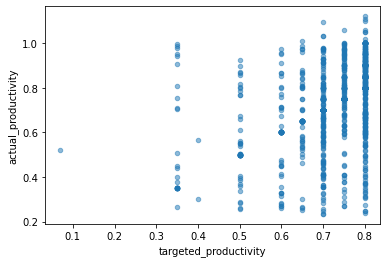

In [7]:
garment_prod.plot.scatter(x='targeted_productivity', y='actual_productivity', alpha = 0.5)

<AxesSubplot:xlabel='targeted_productivity', ylabel='ratio_actual_targeted'>

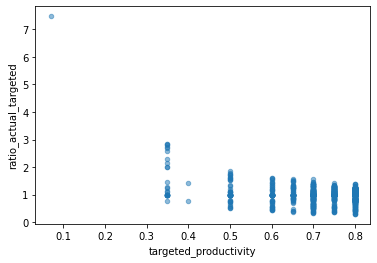

In [8]:
garment_prod.plot.scatter(x='targeted_productivity', y='ratio_actual_targeted', alpha = 0.5)

<AxesSubplot:xlabel='no_of_workers', ylabel='ratio_actual_targeted'>

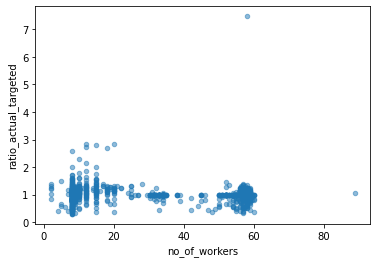

In [9]:
garment_prod.plot.scatter(x='no_of_workers', y='ratio_actual_targeted', alpha = 0.5)

<AxesSubplot:xlabel='no_of_workers', ylabel='actual_productivity'>

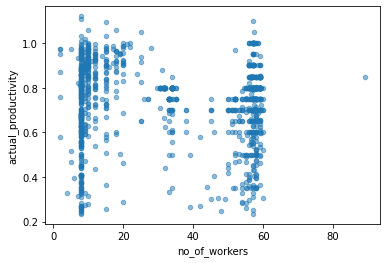

In [10]:
garment_prod.plot.scatter(x='no_of_workers', y='actual_productivity', alpha = 0.5)

In [11]:
garment_workers_actual = garment_prod[['no_of_workers', 'actual_productivity']]
garment_workers_actual.corr(method='pearson')

,no_of_workers,actual_productivity
no_of_workers,1.000000,-0.057991
actual_productivity,-0.057991,1.000000


Try grouping by number of style changes and computing group means for first look to see if it might correlate with productivity.

In [12]:
garment_prod[['no_of_style_change', 'ratio_actual_targeted']].groupby('no_of_style_change').mean()

,ratio_actual_targeted
no_of_style_change,
0,1.031980
1,0.929951
2,0.965601


<AxesSubplot:xlabel='no_of_style_change', ylabel='actual_productivity'>

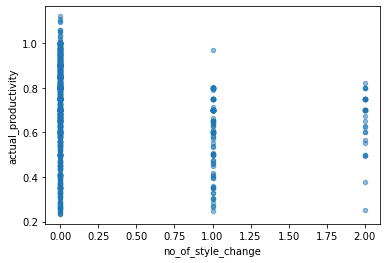

In [13]:
garment_prod.plot.scatter(x='no_of_style_change', y='actual_productivity', alpha = 0.5)

In [14]:
garment_prod[['no_of_style_change', 'actual_productivity']].groupby('no_of_style_change').mean()

,actual_productivity
no_of_style_change,
0,0.750425
1,0.615035
2,0.661932


Take a closer look at actual and targeted productivity.

<AxesSubplot:>

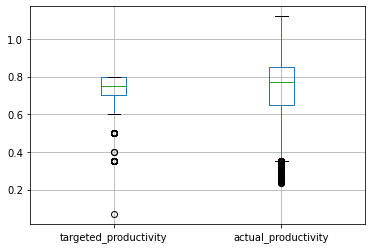

In [15]:
garment_prod.boxplot(column=['targeted_productivity', 'actual_productivity'])

It looks like there are a significant number of events with low 'actual_productivity'. Perhaps these could be predicted, and avoided in the future. As an extension of this project, it might be worth selecting rows with the lowest 'actual_productivity' to see if that improves model prediction.

Generate boxplots to examine distributions of predictor values. Display predictors with different scales on different boxplots.

<AxesSubplot:>

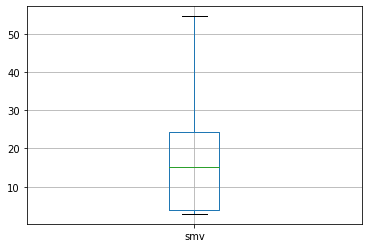

In [16]:
garment_prod.boxplot(column='smv')

<AxesSubplot:>

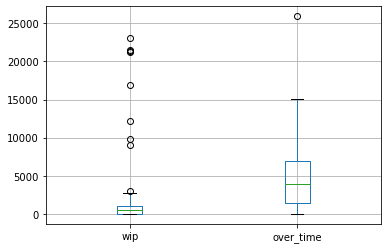

In [17]:
garment_prod.boxplot(column=['wip', 'over_time'])

<AxesSubplot:>

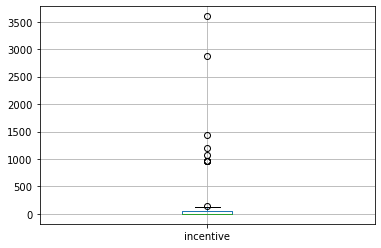

In [18]:
garment_prod.boxplot(column='incentive')

<AxesSubplot:>

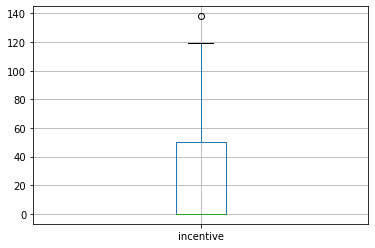

In [19]:
# remove outliers to see distribution of main population better.
garment_prod[garment_prod['incentive'] < 150].boxplot(column='incentive')